In [1]:
#importing important libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
#importing data
df = pd.read_csv(r"C:\Users\megal\Downloads\archive (1)\heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
#checking data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [34]:
#statistical Analysis
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
'''
Conclusion ->
1.from the age column,we can say that the patient from 29 years to 77 years.
2. in the sex column, mean is almost similar to median implaying that data is symmetric.
3. in the chol column, mean is significantly greater than median implying that data is right skewed.(outliers in right tail).
4. in the target column, mean is significantly smaller than median implying that data is right skewed.(outliers in left tail).
'''

In [ ]:
#getting the proportion of values
df['target'].value_counts(normalize=True) *100

target
1    51.317073
0    48.682927
Name: proportion, dtype: float64

In [7]:
#seperating input and output variables
x = df.drop('target',axis = 1)
y = df['target']

#performing train test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 5)

# Decision Tree Model

In [8]:
#creating the DecisionTree Classifier
clf = DecisionTreeClassifier()


In [9]:
#Fitting the data
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [10]:
#taking the predictions from the model
y_train_pred = clf.predict(x_train)
y_pred_dt = clf.predict(x_test)

In [12]:
#model evaluation on training data
print('Training Accuracy :',np.round(metrics.accuracy_score(y_train,y_train_pred),2))
print('Training Precision :',np.round(metrics.precision_score(y_train,y_train_pred),2))
print('Training Recall :',np.round(metrics.recall_score(y_train,y_train_pred),2))
print('Training F1 Score :',np.round(metrics.f1_score(y_train,y_train_pred),2))


#model evaluation on testing data
print('\nTesting Accuracy :',np.round(metrics.accuracy_score(y_test,y_pred_dt),2))
print('Testing Precision :',np.round(metrics.precision_score(y_test,y_pred_dt),2))
print('Testing Recall :',np.round(metrics.recall_score(y_test,y_pred_dt),2))
print('Testing F1 Score :',np.round(metrics.f1_score(y_test,y_pred_dt),2))

Training Accuracy : 1.0
Training Precision : 1.0
Training Recall : 1.0
Training F1 Score : 1.0

Testing Accuracy : 0.99
Testing Precision : 1.0
Testing Recall : 0.97
Testing F1 Score : 0.99


In [ ]:
'''
Conclusions ->
There is no big difference between training and testing performance.
This says that it is good model,
But the model is overfitting (Around 3% difference in training and testing)
'''

In [16]:
import pickle as pkl
with open ('Decision_Tree.pkl','wb') as file:
    pkl.dump(clf,file)

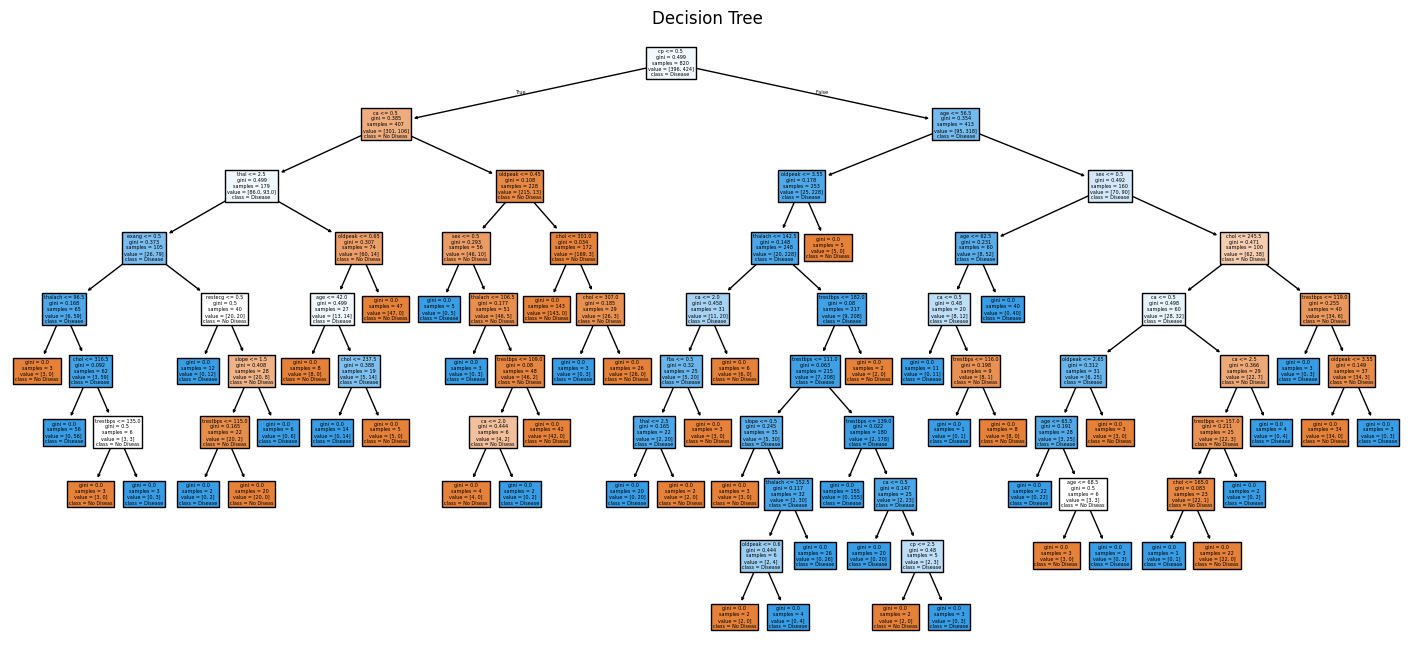

In [13]:
#visualizing the tree
plt.figure(figsize = (18,8))
plot_tree(clf,feature_names = x.columns,class_names = ['No Diseas','Disease'],filled = True)
plt.title('Decision Tree')
plt.show()

# Hyper Parameters

In [14]:
#Performing hyper parameter Optimizer ->
from sklearn.model_selection import GridSearchCV

params=  {
    'criterion' : ['gini','entropy','log_loss'],
    'max_depth' : [1,2,3,4,5],
    'min_samples_split' : [2,4,6,8,10,12,14,16,18,20],
    'min_samples_leaf' :[1,2,3,4,5,6,7,8,9,10],
    'min_impurity_decrease' : [0.1,0.05,0.01,0.015,0.001,0.0001]
}

In [15]:
#using gridsearchcv
clf= DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = clf,param_grid = params,cv = 5, verbose = 1 )
grid_search.fit(x_train,y_train)



Fitting 5 folds for each of 9000 candidates, totalling 45000 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'min_impurity_decrease': [0.1, 0.05, 0.01, 0.015,
                                                   0.001, 0.0001],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16, 18,
                                               20]},
             verbose=1)

In [17]:
#getting the best parameters
print(grid_search.best_params_)


{'criterion': 'entropy', 'max_depth': 5, 'min_impurity_decrease': 0.001, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [18]:
#creating an optimal model
cl = DecisionTreeClassifier(criterion= 'entropy', max_depth= 5, 
                            min_impurity_decrease= 0.001, min_samples_leaf= 1, 
                            min_samples_split= 2)

#fitting the data
cl.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5,
                       min_impurity_decrease=0.001)

In [21]:
#taking the prediction
y_train_pred = cl.predict(x_train)
y_pred_hp = cl.predict(x_test)


In [22]:
#model evaluation on training data
print('Training Accuracy :',np.round(metrics.accuracy_score(y_train,y_train_pred),2))
print('Training Precision :',np.round(metrics.precision_score(y_train,y_train_pred),2))
print('Training Recall :',np.round(metrics.recall_score(y_train,y_train_pred),2))
print('Training F1 Score :',np.round(metrics.f1_score(y_train,y_train_pred),2))


#model evaluation on testing data
print('\nTesting Accuracy :',np.round(metrics.accuracy_score(y_test,y_pred_hp),2))
print('Testing Precision :',np.round(metrics.precision_score(y_test,y_pred_hp),2))
print('Testing Recall :',np.round(metrics.recall_score(y_test,y_pred_hp),2))
print('Testing F1 Score :',np.round(metrics.f1_score(y_test,y_pred_hp),2))

Training Accuracy : 0.93
Training Precision : 0.92
Training Recall : 0.95
Training F1 Score : 0.93

Testing Accuracy : 0.9
Testing Precision : 0.89
Testing Recall : 0.9
Testing F1 Score : 0.9


In [ ]:
'''
Model Overfitting is incresed,
(Around 5% difference in training and testing data)
'''

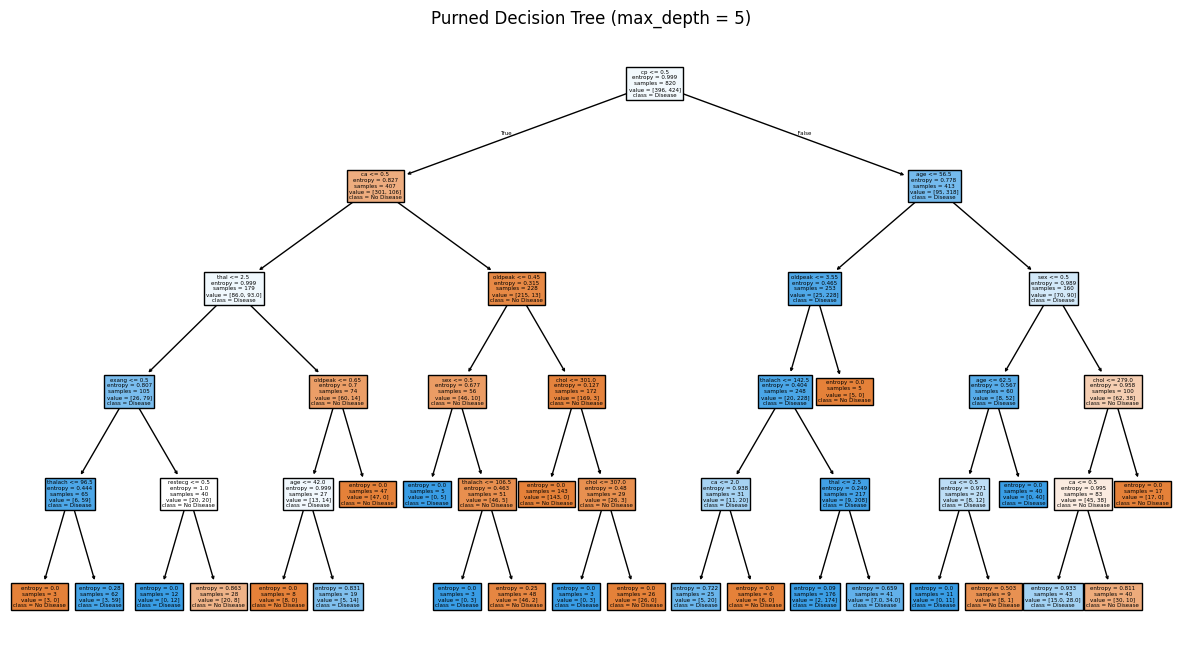

In [23]:
#visualizeing pruned tree
plt.figure(figsize = (15,8))
plot_tree(cl,feature_names = x.columns,class_names = ['No Disease','Disease'],filled = True)
plt.title('Purned Decision Tree (max_depth = 5)')
plt.show()

# Random Forest Model

In [24]:
#creating RandomForest Model
rf = RandomForestClassifier()

#fitting the model
rf.fit(x_train,y_train)

RandomForestClassifier()

In [25]:
#taking prediction from model
y_pred_rf = rf.predict(x_test)
y_train_pred = rf.predict(x_train)

In [27]:
#model evaluation on training data
print("Training Accuracy :",np.round(metrics.accuracy_score(y_train,y_train_pred),2))
print("Training Precision :",np.round(metrics.precision_score(y_train,y_train_pred),2))
print("Training Recall :",np.round(metrics.recall_score(y_train,y_train_pred),2))
print("Training F1 Score :",np.round(metrics.f1_score(y_train,y_train_pred),2))

#model evaluation on testing data
print("\nTesting Accuracy :",np.round(metrics.accuracy_score(y_test,y_pred_rf),2))
print("Testing Precision :",np.round(metrics.precision_score(y_test,y_pred_rf),2))
print("Testing Recall :",np.round(metrics.recall_score(y_test,y_pred_rf),2))
print("Testing F1 Score :",np.round(metrics.f1_score(y_test,y_pred_rf),2))

Training Accuracy : 1.0
Training Precision : 1.0
Training Recall : 1.0
Training F1 Score : 1.0

Testing Accuracy : 1.0
Testing Precision : 1.0
Testing Recall : 1.0
Testing F1 Score : 1.0


In [ ]:
'''
It is an excellent and perfect model, achieving high scores in both training and testing across all metrics.
'''

In [28]:
with open ('Random_Fores.pkl','wb') as file:
    pkl.dump(rf,file)

In [29]:
#Calculating Accuracy
accuracy_dt = metrics.accuracy_score(y_test,y_pred_dt)
accuracy_rf = metrics.accuracy_score(y_test,y_pred_rf)

print(f'Decision Tree Accuracy :{accuracy_dt:.3f}')
print(f'Random Forest Accuracy : {accuracy_rf :.3f}')

Decision Tree Accuracy :0.985
Random Forest Accuracy : 1.000


In [ ]:
'''
In the above comperision  of the accuracy score, decision tree has 0.98 accuracy but in radom forest has 1 so random forest is very good and perfect model
'''

In [85]:
#Feature Importance from RandomForest
importances = rf.feature_importances_
feat_df = pd.DataFrame({'Feature' : x.columns, 'Importance':importances})
feat_df = feat_df.sort_values(by = 'Importance',ascending=False)

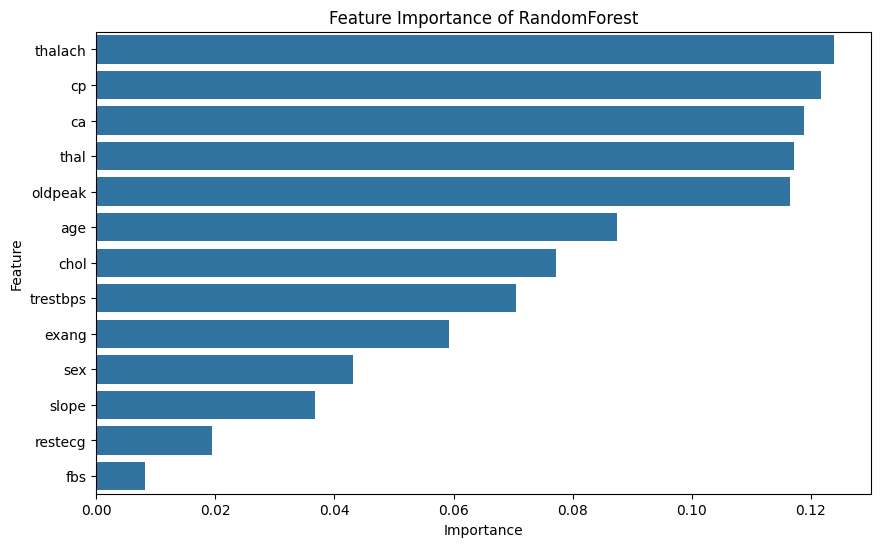

In [87]:
#ploting
plt.figure(figsize =(10,6))
sns.barplot(x = 'Importance',y = 'Feature',data = feat_df)
plt.title("Feature Importance of RandomForest")
plt.show()

In [ ]:
'''
The above plot show that "thalach" has high feature importance 
And fbs has very low 
'''

In [31]:
#5-fold cross-validation on Randonf Forest
cv_score_rf = cross_val_score(rf,x,y,cv = 5)

print('Random Forest CV Accuracy Scores :', cv_score_rf)
print(f'\nAverage CV Accuracy for Random Forest:{cv_score_rf.mean():.3f}')

#For Decision Tree
cv_scores_dt = cross_val_score(clf,x,y,cv = 5)

print('\nDecisio Tree CV Accuracy :',cv_scores_dt)
print(f'\nAverage CV Accuracy Score Decision Tree:{cv_scores_dt.mean():.3f}')

Random Forest CV Accuracy Scores : [1.         1.         1.         1.         0.98536585]

Average CV Accuracy for Random Forest:0.997

Decisio Tree CV Accuracy : [1.         0.98536585 1.         1.         1.        ]

Average CV Accuracy Score Decision Tree:0.997
